## Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score

In [2]:
# load our dataset
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- all our columns in the dataframe are numerical . 

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariate Analysis 

<AxesSubplot:>

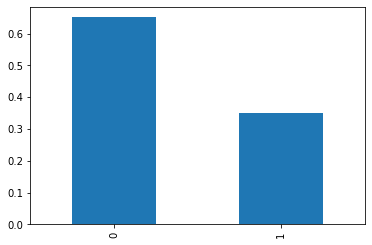

In [5]:
df.Outcome.value_counts(normalize=True).plot.bar()

 we can see that almost 65% of the females in the dataset their outcome was negative (0)

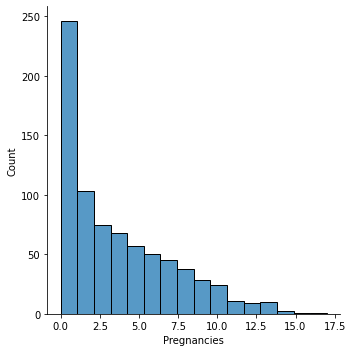

In [6]:
sns.displot(df.Pregnancies)

- A large number of women have not been pregnant 
- We can see some extreme values such as 10++

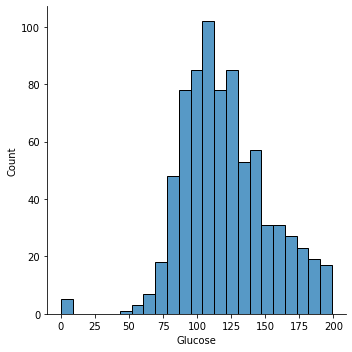

In [7]:
sns.displot(df.Glucose)


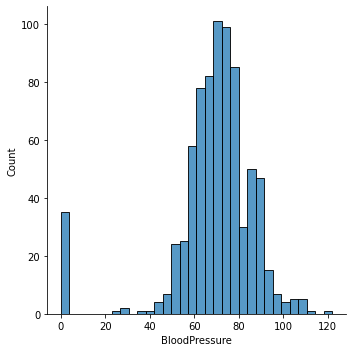

In [8]:
sns.displot(df.BloodPressure)

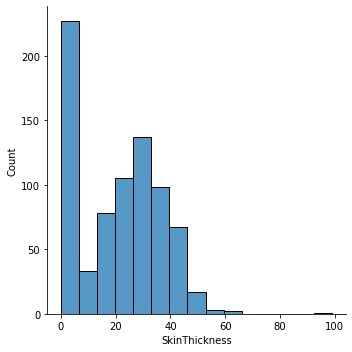

In [9]:
sns.displot(df.SkinThickness)

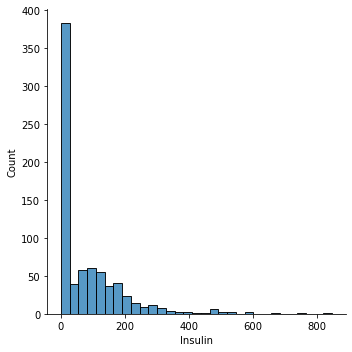

In [10]:
sns.displot(df.Insulin)

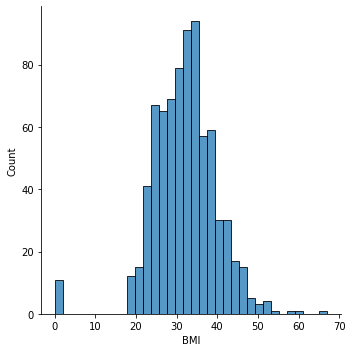

In [11]:
sns.displot(df.BMI)

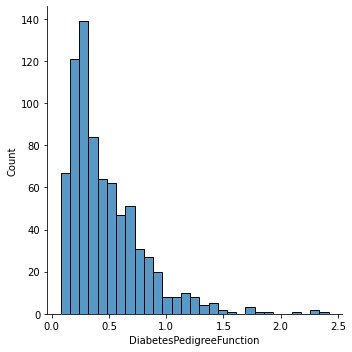

In [12]:
sns.displot(df.DiabetesPedigreeFunction)

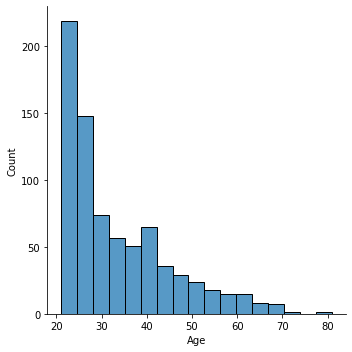

In [13]:
sns.displot(df.Age)

In [14]:
## Skewness
sk= df.skew()
sk

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

the following features are skewed :

- BloodPressure
- Insulin
- DiabetesPedigreeFunction
- Age

In [15]:
## kurtosis 
kr=df.kurtosis()
kr

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

High Kurtosis meanas there are outliers in the features

- loodPressure
- Insulin
- BMI
- DiabetesPedigreeFunction

In [16]:
## further look into outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [17]:
df_copy=df.copy()

In [18]:
print(df.Pregnancies.quantile(0.10))
print(df.Pregnancies.quantile(0.90))

0.0
9.0


In [19]:
df.Pregnancies.median()

3.0

In [20]:
df['Pregnancies'] = np.where(df['Pregnancies'] > 9.0, 3.0, df['Pregnancies'])

In [21]:
print(df.BloodPressure.quantile(0.10))
print(df.BloodPressure.quantile(0.90))

54.0
88.0


In [22]:
df.BloodPressure.median()

72.0

In [23]:
df['BloodPressure'] = np.where(df['BloodPressure'] > 88.0, 72.0, df['BloodPressure'])

In [24]:
print(df.SkinThickness.quantile(0.10))
print(df.SkinThickness.quantile(0.90))

0.0
40.0


In [25]:
df.SkinThickness.median()

23.0

In [26]:
df['SkinThickness'] = np.where(df['SkinThickness'] > 40.0, 23.0, df['BloodPressure'])

In [27]:
df['SkinThickness'] = np.where(df['SkinThickness'] == 0.0, 18.5, df['BloodPressure'])

In [28]:
print(df.Insulin.quantile(0.10))
print(df.Insulin.quantile(0.90))

0.0
210.0


In [29]:
df.Insulin.median()

30.5

In [30]:
df['Insulin'] = np.where(df['Insulin'] > 210.0, 30.5, df['Insulin'])

In [31]:
print(df.BMI.quantile(0.10))
print(df.BMI.quantile(0.90))

23.6
41.5


In [32]:
df.BMI.median()

32.0

In [33]:
df['BMI'] = np.where(df['BMI'] > 41.5, 32.0, df['BMI'])

In [34]:
print(df.DiabetesPedigreeFunction.quantile(0.10))
print(df.DiabetesPedigreeFunction.quantile(0.90))

0.165
0.8786


In [35]:
df.DiabetesPedigreeFunction.median()

0.3725

In [36]:
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] > 0.8786, 0.3725, df['DiabetesPedigreeFunction'])

In [37]:
## checking for missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Since we have removed the upper outliers in most of the features , we also need to eliminate the lower outliers in the features provided

In [38]:
df['Age'] = np.where(df['Age'] > 51.0, 29.0, df['Age'])

In [39]:
df['Glucose'] = np.where(df['Glucose'] == 0.0, 117.0, df['Glucose'])

In [40]:
df['BMI'] = np.where(df['BMI'] == 0.0, 32.0, df['BMI'])

In [41]:
df['BloodPressure'] = np.where(df['BloodPressure'] < 50.0, 72.0, df['BloodPressure'])

In [42]:
df['SkinThickness'] = np.where(df['SkinThickness'] < 45.0, 72.0, df['SkinThickness'])

<AxesSubplot:>

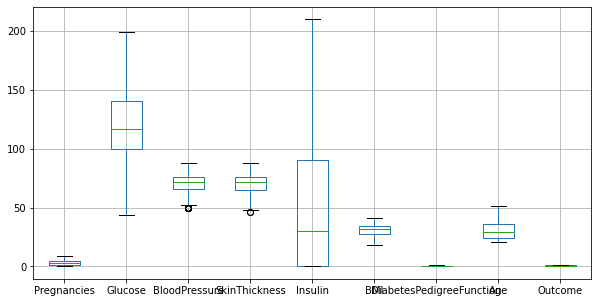

In [43]:
boxplot = df.boxplot(figsize=(10,5))
boxplot

<AxesSubplot:>

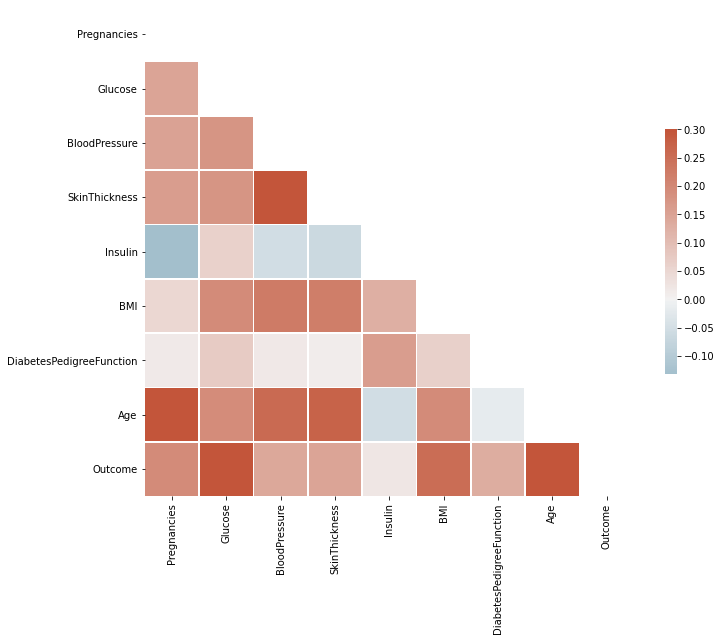

In [44]:
## scaling is required 
#lets have a look at correlation

#correlation heatmap 
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- There's a strong relationship between Age and Pregnancies
- There's a strong relationship between Glucose and Outcome
- There's a strong relationship between BloodPressure and SkinThickness
- There's a strong relationship between Age and Outcome

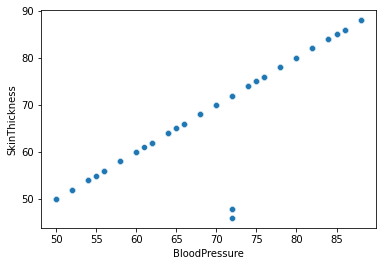

In [45]:
#scatterplot
ax = sns.scatterplot(x="BloodPressure", y="SkinThickness", data=df)


- Wow! ,Blood Pressure and SkinThickness have a perfectly linear relationship
- They have a positive correlation

In [46]:
#scaling 
y= df.Outcome
df.drop(['Outcome'],axis=1,inplace=True)
X=df


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)


          0         1         2         3         4         5         6  \
0  1.088697  0.866045  0.099193  0.120916 -0.791165  0.495999  1.254083   
1 -0.864853 -1.205066 -0.589184 -0.545569 -0.791165 -0.883102 -0.191363   
2  1.870116  2.016662 -0.818643 -0.767730 -0.791165 -1.533250  1.489753   
3 -0.864853 -1.073567 -0.589184 -0.545569  0.733854 -0.587580 -1.154993   
4 -1.255562  0.504422  0.099193  0.120916  1.934401  0.180776 -0.078765   

          7  
0  2.472022  
1  0.081582  
2  0.207394  
3 -1.176545  
4  0.333207  


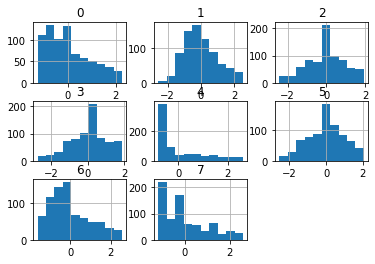

In [48]:
#convert the array back to dataframe 
# convert the array back to a dataframe
X = pd.DataFrame(scaled)
# summarize
print(X.head())
# histograms of the variables
X.hist()
plt.show()

In [49]:
# split data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 25)

In [50]:
clf = RandomForestClassifier(random_state=23,n_estimators=200)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
print("The accuracy score is :::--->>>>",accuracy_score(y_test,y_preds))

The accuracy score is :::--->>>> 0.8116883116883117


In [51]:

xgb = XGBClassifier(random_state=23)
xgb.fit(X_train,y_train)
y_preds = xgb.predict(X_test)
print("The accuracy score is :::--->>>>",accuracy_score(y_test,y_preds))


[12:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score is :::--->>>> 0.7532467532467533


In [52]:
gbc = GradientBoostingClassifier(random_state=23,learning_rate=0.05,n_estimators=50)


gbc.fit(X_train,y_train)
y_preds = gbc.predict(X_test)
print("The accuracy score is :::--->>>>",accuracy_score(y_test,y_preds))

The accuracy score is :::--->>>> 0.8051948051948052


In [53]:
lgb = LGBMClassifier(n_estimators=150, silent=False, random_state =94, max_depth=5,num_leaves=31,objective='binary',metrics ='auc')



lgb.fit(X_train,y_train)
y_preds = lgb.predict(X_test)
print("The accuracy score is :::--->>>>",accuracy_score(y_test,y_preds))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 217, number of negative: 397
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353420 -> initscore=-0.604039
[LightGBM] [Info] Start training from score -0.604039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [54]:
adc = AdaBoostClassifier(learning_rate=0.05, n_estimators=150)



adc.fit(X_train,y_train)
y_preds = adc.predict(X_test)
print("The accuracy score is :::--->>>>",accuracy_score(y_test,y_preds))

The accuracy score is :::--->>>> 0.8051948051948052


In [55]:
knn = KNeighborsClassifier(n_neighbors=18)



knn.fit(X_train,y_train)
y_preds = knn.predict(X_test)
print("The accuracy score is :::--->>>>",accuracy_score(y_test,y_preds))

The accuracy score is :::--->>>> 0.7922077922077922


In [56]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
confusion_matrix(y_test,y_preds)
pd.crosstab(y_test, y_preds, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,99,4,103
1,28,23,51
All,127,27,154


In [57]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       103
           1       0.85      0.45      0.59        51

    accuracy                           0.79       154
   macro avg       0.82      0.71      0.73       154
weighted avg       0.80      0.79      0.77       154



In [58]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

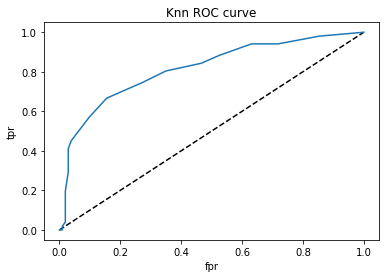

In [59]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn ROC curve')
plt.show()

In [60]:
roc_auc_score(y_test,y_pred_proba)

0.8155339805825242